## **Ejemplo de EDA: Análisis Exploratorio de Datos**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
url = 'https://raw.githubusercontent.com/lorey/list-of-countries/master/csv/countries.csv'
df=pd.read_csv(url, sep=";")

### **Conocer información básica**

In [ ]:
print("Cantidad de filas y columnas del dataframe:", df.shape)

Cantidad de filas y columnas del dataframe: (252, 19)


In [ ]:
print("Nombres de las columnas: ", df.columns)

Nombres de las columnas:  Index(['alpha_2', 'alpha_3', 'area', 'capital', 'continent', 'currency_code',
       'currency_name', 'eqivalent_fips_code', 'fips', 'geoname_id',
       'languages', 'name', 'neighbours', 'numeric', 'phone', 'population',
       'postal_code_format', 'postal_code_regex', 'tld'],
      dtype='object')


In [ ]:
df.head(15)

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
0,AD,AND,468.0,Andorra la Vella,EU,EUR,Euro,NaN,AN,3041565,ca,Andorra,"ES,FR",20,376,84000,AD###,^(?:AD)*(\d{3})$,.ad
1,AE,ARE,82880.0,Abu Dhabi,AS,AED,Dirham,NaN,AE,290557,"ar-AE,fa,en,hi,ur",United Arab Emirates,"SA,OM",784,971,4975593,NaN,NaN,.ae
2,AF,AFG,647500.0,Kabul,AS,AFN,Afghani,NaN,AF,1149361,"fa-AF,ps,uz-AF,tk",Afghanistan,"TM,CN,IR,TJ,PK,UZ",4,93,29121286,NaN,NaN,.af
3,AG,ATG,443.0,St. John's,NaN,XCD,Dollar,NaN,AC,3576396,en-AG,Antigua and Barbuda,NaN,28,+1-268,86754,NaN,NaN,.ag
4,AI,AIA,102.0,The Valley,NaN,XCD,Dollar,NaN,AV,3573511,en-AI,Anguilla,NaN,660,+1-264,13254,NaN,NaN,.ai
5,AL,ALB,28748.0,Tirana,EU,ALL,Lek,NaN,AL,783754,"sq,el",Albania,"MK,GR,ME,RS,XK",8,355,2986952,NaN,NaN,.al
6,AM,ARM,29800.0,Yerevan,AS,AMD,Dram,NaN,AM,174982,hy,Armenia,"GE,IR,AZ,TR",51,374,2968000,######,^(\d{6})$,.am
7,AO,AGO,1246700.0,Luanda,AF,AOA,Kwanza,NaN,AO,3351879,pt-AO,Angola,"CD,NA,ZM,CG",24,244,13068161,NaN,NaN,.ao
8,AQ,ATA,14000000.0,NaN,AN,NaN,NaN,NaN,AY,6697173,NaN,Antarctica,NaN,10,NaN,0,NaN,NaN,.aq
9,AR,ARG,2766890.0,Buenos Aires,SA,ARS,Peso,NaN,AR,3865483,"es-AR,en,it,de,fr,gn",Argentina,"CL,BO,UY,PY,BR",32,54,41343201,@####@@@,"^[A-Z]?\d{4}[A-Z]{0,3}$",.ar


In [ ]:
df.describe()

,area,geoname_id,numeric,population
count,2.520000e+02,2.520000e+02,252.000000,2.520000e+02
mean,5.952879e+05,2.427870e+06,434.309524,2.727679e+07
std,1.904818e+06,1.632093e+06,254.663139,1.164127e+08
min,0.000000e+00,4.951800e+04,0.000000,0.000000e+00
25%,1.098000e+03,1.163774e+06,217.000000,1.879528e+05
50%,6.489450e+04,2.367967e+06,436.000000,4.268583e+06
75%,3.622245e+05,3.478296e+06,652.500000,1.536688e+07
max,1.710000e+07,8.505033e+06,894.000000,1.330044e+09


### **Matriz de Correlación**

In [ ]:
corr=df.set_index("alpha_3").corr(numeric_only=True)
corr

,area,geoname_id,numeric,population
area,1.000000,0.120399,-0.089264,0.412864
geoname_id,0.120399,1.000000,0.038707,-0.066105
numeric,-0.089264,0.038707,1.000000,-0.041140
population,0.412864,-0.066105,-0.041140,1.000000


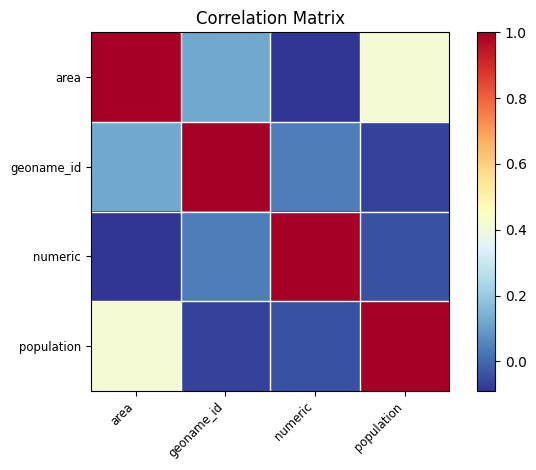

In [ ]:
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

In [ ]:
url = 'https://raw.githubusercontent.com/DrueStaples/Population_Growth/master/countries.csv'
df_pob=pd.read_csv(url, sep=",")

In [ ]:
df_pob_co=df_pob[df_pob["country"]=="Colombia"]
df_pob_co

,country,year,population
300,Colombia,1952,12350771
301,Colombia,1957,14485993
302,Colombia,1962,17009885
303,Colombia,1967,19764027
304,Colombia,1972,22542890
305,Colombia,1977,25094412
306,Colombia,1982,27764644
307,Colombia,1987,30964245
308,Colombia,1992,34202721
309,Colombia,1997,37657830


In [ ]:
df_pob_co.shape

(12, 3)

<Axes: >

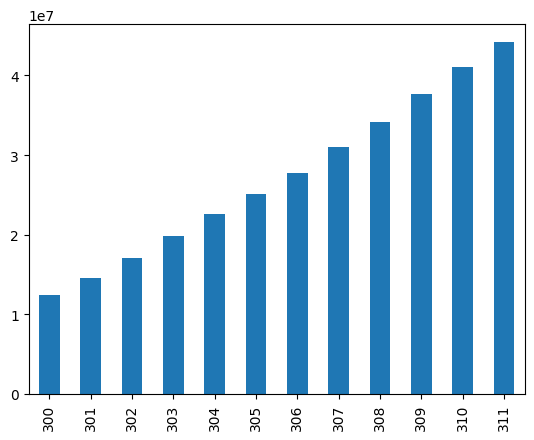

In [ ]:
df_pob_co.drop(["country"],axis=1)["population"].plot(kind="bar")

In [ ]:
df_pob_ar=df_pob[df_pob["country"]=="Argentina"]
df_pob_ar

,country,year,population
48,Argentina,1952,17876956
49,Argentina,1957,19610538
50,Argentina,1962,21283783
51,Argentina,1967,22934225
52,Argentina,1972,24779799
53,Argentina,1977,26983828
54,Argentina,1982,29341374
55,Argentina,1987,31620918
56,Argentina,1992,33958947
57,Argentina,1997,36203463


<Axes: xlabel='year'>

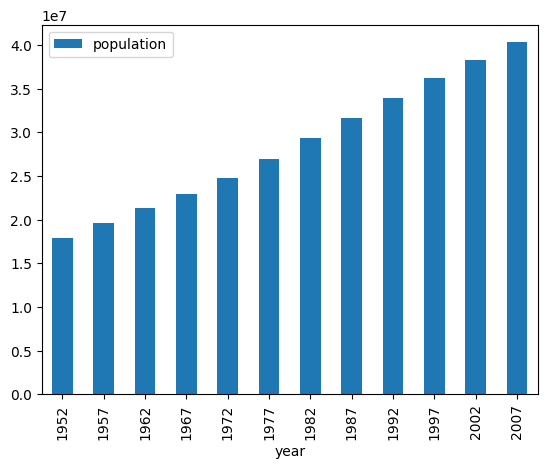

In [ ]:
df_pob_ar.set_index("year").plot(kind="bar")

<Axes: xlabel='year'>

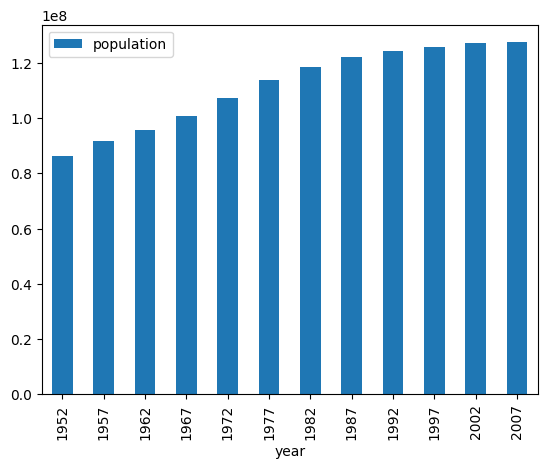

In [ ]:
df_pob_jap=df_pob[df_pob["country"]=="Japan"]
df_pob_jap.set_index("year").plot(kind="bar")

<Axes: >

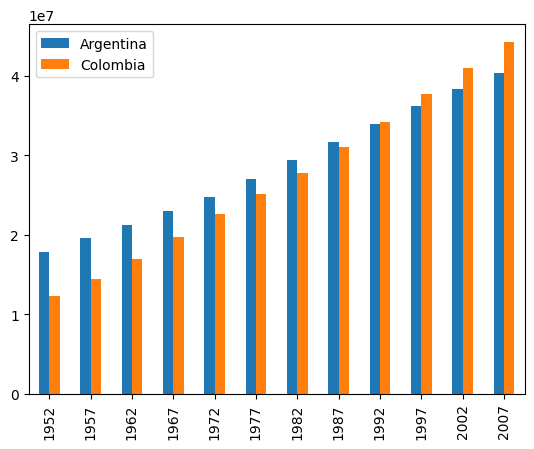

In [ ]:
años=df_pob_co["year"].unique()
pob_ar=df_pob_ar["population"].values
pob_co=df_pob_co["population"].values

datos_plot=pd.DataFrame({"Argentina":pob_ar, "Colombia":pob_co}, index=años)
datos_plot.plot(kind="bar")

### **Filtremos paises hispano-hablantes**

In [ ]:
df_esp=df.replace(np.nan, "", regex=True)
df_esp=df_esp[df_esp["languages"].str.contains("es")]
df_esp

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld,densidad_demografica
82,GI,GIB,6.5,Gibraltar,EU,GIP,Pound,,GI,2411586,"en-GI,es,it,pt",Gibraltar,ES,292,350,27884,,,.gi,4289.846154
182,PR,PRI,9104.0,San Juan,,USD,Dollar,,RQ,4566966,"en-PR,es-PR",Puerto Rico,,630,+1-787 and 1-939,3916632,#####-####,^00[679]\d{2}(?:-\d{4})?$,.pr,430.210018
13,AW,ABW,193.0,Oranjestad,,AWG,Guilder,,AA,3577279,"nl-AW,es,en",Aruba,,533,297,71566,,,.aw,370.80829
251,AN,ANT,960.0,Willemstad,,ANG,Guilder,,NT,8505032,"nl-AN,en,es",Netherlands Antilles,GP,530,599,300000,,,.an,312.5
210,SV,SLV,21040.0,San Salvador,,USD,Dollar,,ES,3585968,es-SV,El Salvador,"GT,HN",222,503,6052064,CP ####,^(?:CP)*(\d{4})$,.sv,287.645627
226,TT,TTO,5128.0,Port of Spain,,TTD,Dollar,,TD,3573591,"en-TT,hns,fr,es,zh",Trinidad and Tobago,,780,+1-868,1228691,,,.tt,239.604329
60,DO,DOM,48730.0,Santo Domingo,,DOP,Peso,,DR,3508796,es-DO,Dominican Republic,HT,214,+1-809 and 1-829,9823821,#####,^(\d{5})$,.do,201.596983
90,GT,GTM,108890.0,Guatemala City,,GTQ,Quetzal,,GT,3595528,es-GT,Guatemala,"MX,HN,BZ,SV",320,502,13550440,#####,^(\d{5})$,.gt,124.441547
50,CU,CUB,110860.0,Havana,,CUP,Peso,,CU,3562981,es-CU,Cuba,US,192,53,11423000,CP #####,^(?:CP)*(\d{5})$,.cu,103.03987
67,ES,ESP,504782.0,Madrid,EU,EUR,Euro,,SP,2510769,"es-ES,ca,gl,eu,oc",Spain,"AD,PT,GI,FR,MA",724,34,46505963,#####,^(\d{5})$,.es,92.130787


In [ ]:
df_esp.shape

(29, 19)

### **Visualicemos por población**

<Axes: xlabel='alpha_3'>

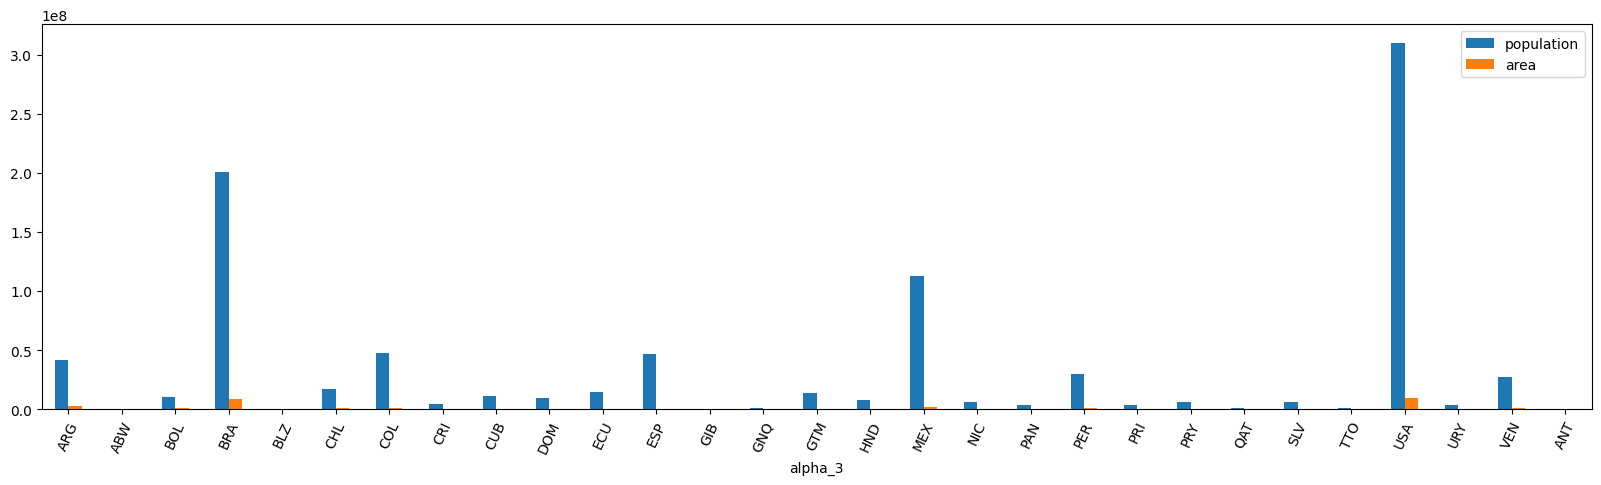

In [ ]:
df_esp.set_index("alpha_3")[["population","area"]].plot(kind="bar", rot=65, figsize=(20,5))

### **Detección de Outliers**

In [ ]:
anomalias=[]
#creamos una funcion que, encuentra los atipico o outliers
def buscar_anomalias(dataframe):
  df_std=dataframe.std()
  df_mean=dataframe.mean()
  corteAnomalo=df_std*2
  limite_menor=df_mean-corteAnomalo
  limite_mayor=df_mean+corteAnomalo
  print(limite_menor.iloc[0])
  print(limite_mayor.iloc[0])

  #generacion de las anomalias
  for index, row in dataframe.iterrows():
    outlier=row # obtener columna    fila: columna1|columna2|columna3
    if (outlier.iloc[0]>limite_mayor.iloc[0]) or (outlier.iloc[0]<limite_menor.iloc[0]):
      anomalias.append(index)
  return anomalias

In [ ]:
df_esp.set_index("alpha_3")[["population"]]

,population
alpha_3,
ARG,41343201
ABW,71566
BOL,9947418
BRA,201103330
BLZ,314522
CHL,16746491
COL,47790000
CRI,4516220
CUB,11423000


In [ ]:
buscar_anomalias(df_esp.set_index("alpha_3")[["population"]])

-102872707.87855022
167589161.25786057


['BRA', 'USA']

In [ ]:
indices_anomalies=df_esp[df_esp["alpha_3"].isin(anomalias)].index.tolist()
indices_anomalies

[233, 30]

In [ ]:
#Quitar BRA y USA por ser considerados atipicos y volvemos a graficar

df_esp.drop([30,233], inplace=True)

<Axes: xlabel='alpha_3'>

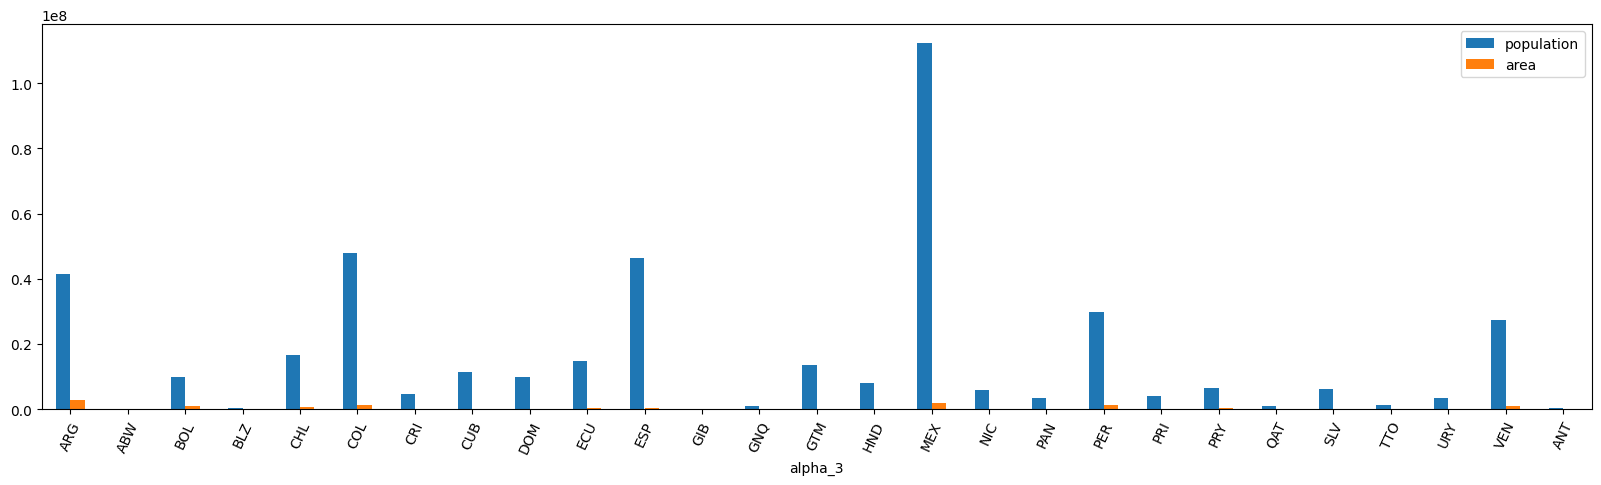

In [ ]:
df_esp.set_index("alpha_3")[["population","area"]].plot(kind="bar", rot=65, figsize=(20,5))

### **Graficamos ordenando por tamaño Población**

<Axes: xlabel='alpha_3'>

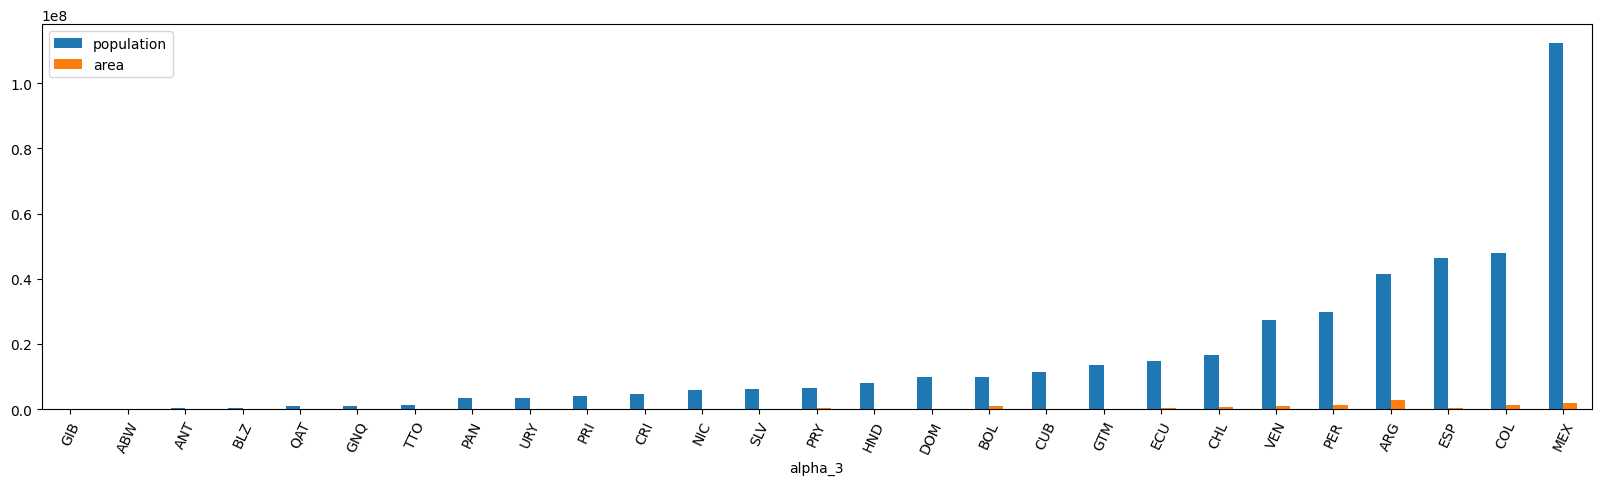

In [ ]:
df_esp.set_index("alpha_3")[["population","area"]].sort_values(["population"]).plot(kind="bar", rot=65, figsize=(20,5))

### **Visualización por Área**

<Axes: xlabel='alpha_3'>

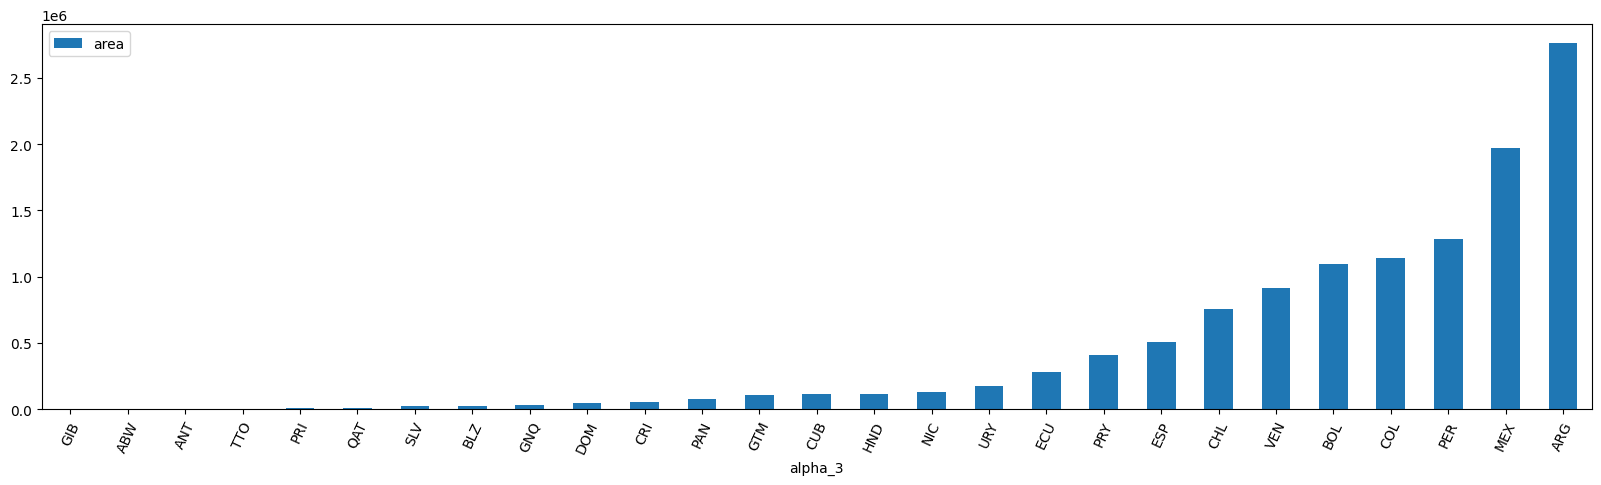

In [ ]:
df_esp.set_index("alpha_3")[["area"]].sort_values(["area"]).plot(kind="bar", rot=65, figsize=(20,5))

In [ ]:
#En este caso podriamos quitar "por lo bajo" a los paises con areas menores a 200km2
df_2=df_esp.set_index("alpha_3")
df_2=df_2[df_2["area"]>200000]
df_2

,alpha_2,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
alpha_3,,,,,,,,,,,,,,,,,,
ARG,AR,2766890.0,Buenos Aires,SA,ARS,Peso,,AR,3865483,"es-AR,en,it,de,fr,gn",Argentina,"CL,BO,UY,PY,BR",32,54,41343201,@####@@@,"^[A-Z]?\d{4}[A-Z]{0,3}$",.ar
BOL,BO,1098580.0,Sucre,SA,BOB,Boliviano,,BL,3923057,"es-BO,qu,ay",Bolivia,"PE,CL,PY,BR,AR",68,591,9947418,,,.bo
CHL,CL,756950.0,Santiago,SA,CLP,Peso,,CI,3895114,es-CL,Chile,"PE,BO,AR",152,56,16746491,#######,^(\d{7})$,.cl
COL,CO,1138910.0,Bogota,SA,COP,Peso,,CO,3686110,es-CO,Colombia,"EC,PE,PA,BR,VE",170,57,47790000,,,.co
ECU,EC,283560.0,Quito,SA,USD,Dollar,,EC,3658394,es-EC,Ecuador,"PE,CO",218,593,14790608,@####@,^([a-zA-Z]\d{4}[a-zA-Z])$,.ec
ESP,ES,504782.0,Madrid,EU,EUR,Euro,,SP,2510769,"es-ES,ca,gl,eu,oc",Spain,"AD,PT,GI,FR,MA",724,34,46505963,#####,^(\d{5})$,.es
MEX,MX,1972550.0,Mexico City,,MXN,Peso,,MX,3996063,es-MX,Mexico,"GT,US,BZ",484,52,112468855,#####,^(\d{5})$,.mx
PER,PE,1285220.0,Lima,SA,PEN,Sol,,PE,3932488,"es-PE,qu,ay",Peru,"EC,CL,BO,BR,CO",604,51,29907003,,,.pe
PRY,PY,406750.0,Asuncion,SA,PYG,Guarani,,PA,3437598,"es-PY,gn",Paraguay,"BO,BR,AR",600,595,6375830,####,^(\d{4})$,.py


In [ ]:
df_2.shape

(10, 18)

<Axes: xlabel='alpha_3'>

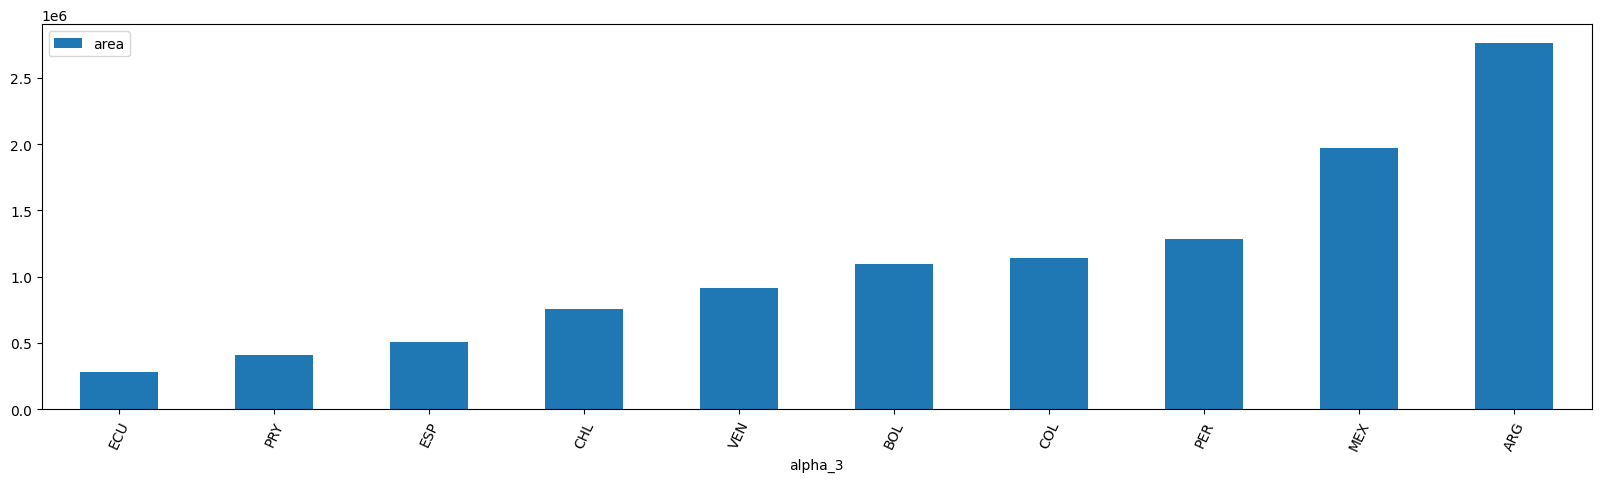

In [ ]:
df_2[["area"]].sort_values(["area"]).plot(kind="bar", rot=65, figsize=(20,5))

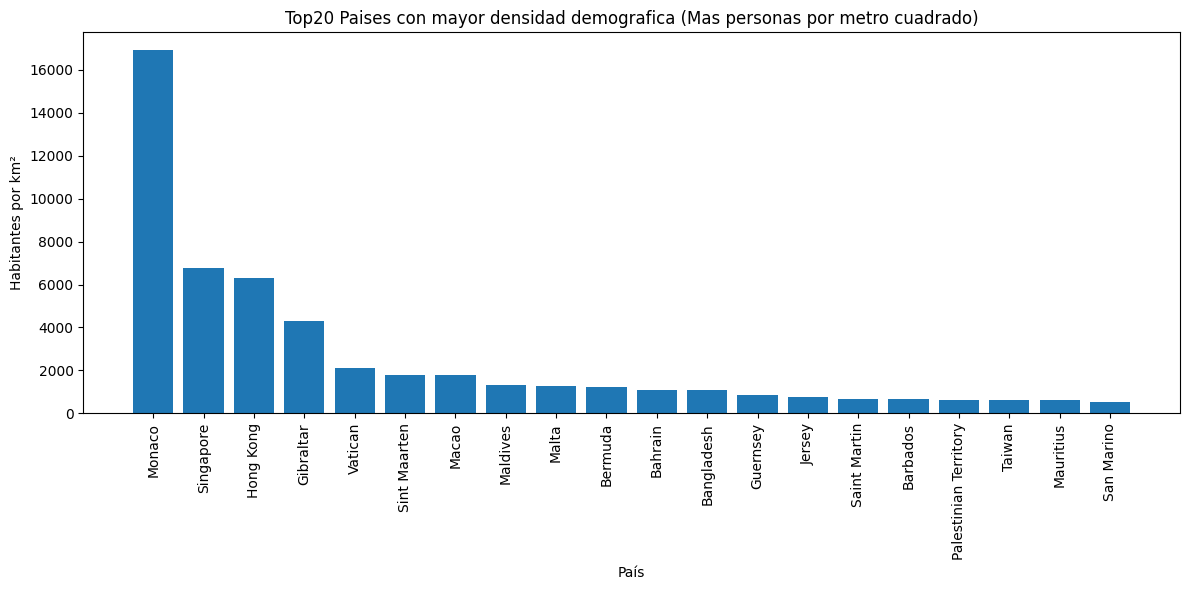

In [ ]:
#Top20 Paises con mayor densidad demografica (Mas personas por metro cuadrado)

df["densidad_demografica"] = df["population"] / df["area"]
df = df.sort_values(by="densidad_demografica", ascending=False)

# Conservar solo los primeros 20 países
df_top_20 = df.head(20)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(df_top_20["name"], df_top_20["densidad_demografica"])
plt.xlabel("País")
plt.ylabel("Habitantes por km²")
plt.title("Top20 Paises con mayor densidad demografica (Mas personas por metro cuadrado)")
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mayor legibilidad

plt.tight_layout()
plt.show()